In [1]:
# Load the required libraries 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from xgboost import XGBClassifier

In [2]:
# Load the required data set 
df = pd.read_csv("../data/preprocessed/fraudTrain.csv")
df.head()

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour,age
0,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0,1,1,0,37
1,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0,1,1,0,47
2,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0,1,1,0,63
3,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0,1,1,0,58
4,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0,1,1,0,39


**Split data into independent(X) and dependent(y) features**

In [3]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

**Split data into test and train** 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train.shape

(1037340, 17)

In [6]:
y_test.shape

(259335,)

In [7]:
df.shape

(1296675, 18)

# Model Training
## XGBoost Classifier

In [8]:
# Create an instance of XGBoost Classifier
xgboost_clf = XGBClassifier()

In [9]:
# Train the model 
xgboost_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

**Model Evaluation**

In [10]:
# Run predictions using the fitted model
y_pred = xgboost_clf.predict(X_test)

In [11]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.9987275146046619

In [12]:
# Precision Score 
precision_score(y_test, y_pred)

0.9452843772498201

In [13]:
# Recall Score
recall_score(y_test, y_pred)

0.8379068283343969

In [14]:
# f1 score 
f1_score(y_test, y_pred)

0.8883626522327469

*Confusion Matrix*

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

In [16]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

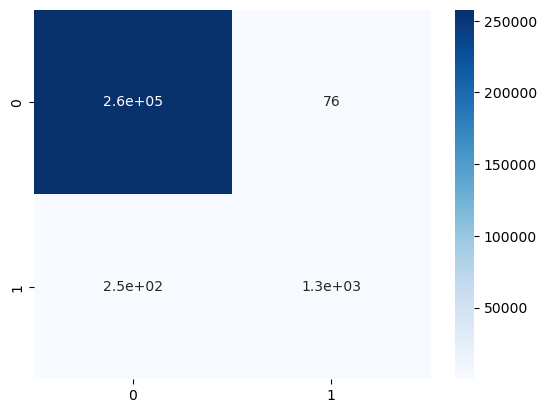

In [17]:
sns.heatmap(cm, cmap="Blues", annot=True)

## LightGBM Classifier

In [18]:
from lightgbm import LGBMClassifier

In [19]:
# Create an instance of the model 
lightgbm_clf = LGBMClassifier(objective='binary', metric='binary_logloss')

In [20]:
# Fit the model  
lightgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5939, number of negative: 1031401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2746
[LightGBM] [Info] Number of data points in the train set: 1037340, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005725 -> initscore=-5.157133
[LightGBM] [Info] Start training from score -5.157133


LGBMClassifier(metric='binary_logloss', objective='binary')

In [21]:
# Run predictions on the validation dataset 
y_pred = lightgbm_clf.predict(X_test)

**Model Evaluation** - LightGBM Classifier

In [23]:
# Accuracy Score 
accuracy_score(y_test, y_pred)

0.997131123835965

In [24]:
# Precision Score 
precision_score(y_test, y_pred)

0.7602783048703352

In [25]:
recall_score(y_test, y_pred)

0.767070835992342

In [26]:
# f1 score 
f1_score(y_test, y_pred)

0.7636594663278272

<Axes: >

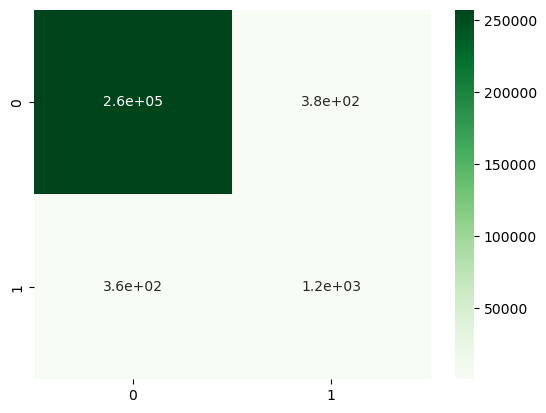

In [27]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, cmap="Greens", annot=True)

## Logistic Regression

## Random Forest Regression 

## PyCaret Classification - Find how to use it!